# **Web Scraping Assignment - Data Analysis Course**

**Welcome** to the Web Scraping assignment. Your task is to scrape rental price data for apartments in Cluj-Napoca from the OLX website and create meaningful visual representations of the collected data. Use Python and relevant libraries to extract, process, and visualize the information.

---

### **Task Description**

The goal of this assignment is to scrape rental listings from OLX for apartments in Cluj-Napoca and analyze the relationship between apartment sizes, room categories, and rental prices. You will:

1. **Extract Data** from multiple pages of OLX rental listings in Cluj-Napoca. [Visit the website here](https://www.olx.ro/imobiliare/apartamente-garsoniere-de-inchiriat/cluj-napoca/).
2. **Visualize rental prices** as a function of apartment size.
3. **Categorize apartments by the number of rooms** and analyze price variations across these categories.
4. **Calculate average rental prices** for different size groups and room categories.

---

### **Data Collection & Web Scraping**

- Use **BeautifulSoup** and **Requests** to extract rental prices, apartment sizes, and room numbers from OLX listings.
- Scrape data from **multiple pages** to ensure a representative sample size.
- Organize the data into a structured format such as a **Pandas DataFrame** for easier analysis.

---

### **Data Visualization Requirements**

- Create **various visualizations** to effectively represent the data and highlight trends.
- Ensure the visualizations are easy to understand, with proper labels, titles, and legends.
- Focus on visualizing the relationship between rental prices, apartment sizes, and room categories.

---

### **Submission Instructions**

1. **Upload your solution to GitHub** in the same project as your previous assignment. If the dataset is too large to upload, provide a link to the data in your notebook.
2. Ensure that the code is well-documented and easy to follow.

---

### **Exploration and Tools**

For this assignment, you are encouraged to explore the following libraries:

- **Requests**
- **BeautifulSoup**

To get started with web scraping, check out these tutorials that provide step-by-step guidance:

- [Web Scraping Tutorial 1](https://colab.research.google.com/github/Giffy/AI_Intro-to-Machine-Learning/blob/master/Session-9/Intro_to_web_scraping.ipynb#scrollTo=nekvLjaS6WNz)  
- [Web Scraping Tutorial 2](https://colab.research.google.com/github/nestauk/im-tutorials/blob/3-ysi-tutorial/notebooks/Web-Scraping/Web%20Scraping%20Tutorial.ipynb#scrollTo=qK-EQGZ6DAuv)


**Minimalist Example**

Extracting all external links from the Wikipedia page about the blue whale:

In [70]:
%%capture
!pip install requests_html
!pip install lxml_html_clean
!pip install bs4

In [71]:
from requests_html import HTMLSession
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [72]:
def get_page (website_url):
    session = HTMLSession()
    session.headers['user-agent'] = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36'
    response = session.get(website_url, headers=session.headers)
    return response.content

In [73]:
wiki_url = 'https://en.wikipedia.org/wiki/Blue_whale'
blue_whale_page = get_page(wiki_url)
soup = BeautifulSoup(blue_whale_page)

In [74]:
links = soup.find_all('a')

In [75]:
external_links = [link['href'] for link in links if 'href' in link.attrs and "https" in link['href']]

In [76]:
a = []
p = []
r = []
rooms = ['1-camera', '2-camere', '3-camere', '4-camere']
for room in rooms:
  for page in range(1, 25):
    if page == 1:
      olx_url = f'https://www.olx.ro/imobiliare/apartamente-garsoniere-de-inchiriat/{room}/cluj-napoca/'
    else:
      olx_url = f'https://www.olx.ro/imobiliare/apartamente-garsoniere-de-inchiriat/{room}/cluj-napoca/?page={page}'
    apartamente = get_page(olx_url)
    olx_soup = BeautifulSoup(apartamente)
    listings = olx_soup.find_all('div', class_ = 'css-1apmciz')
    if len(listings) == 0:
      break
    for listing in listings:
      price = listing.find_all('p', class_ = 'css-6j1qjp')
      area = listing.find_all('span', class_ = 'css-6as4g5')
      if len(price) > 0 and len(area) > 0:
        price = price[0].get_text(strip = True)
        area = area[0].get_text(strip = True)
        match = re.search(r'[\d\s]+', price)
        r.append(room)
        if match:
          p.append(int(match.group().replace(' ', '')))
        else:
          p.append(-1)
        match = re.search(r'\d+', area)
        if match:
          a.append(int(match.group()))
        else:
          a.append(-1)

In [77]:
mask = np.where((np.array(a) > 0) & (np.array(p) > 0) & (np.array(p) < 10000))
a = np.array(a)[mask]
p = np.array(p)[mask]
r = np.array(r)[mask]
df = pd.DataFrame({'Apartment Size': a, 'Rental Price': p, 'Room Number': r})
bins = [0, 30, 40, 50, 60, 70, 80, 1000]
labels = ['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
df['Size Category'] = pd.cut(df['Apartment Size'], bins=bins, labels=labels)

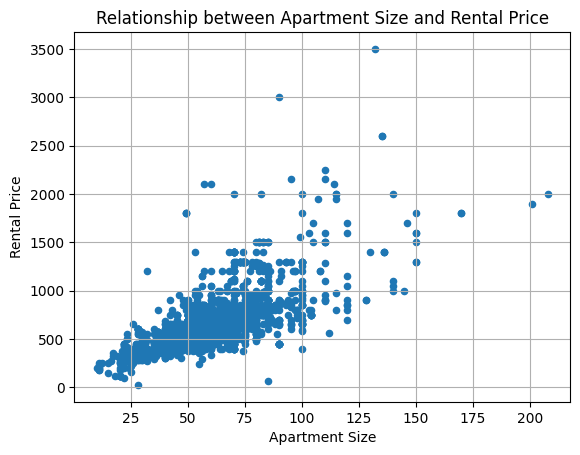

In [78]:
df.plot.scatter('Apartment Size', 'Rental Price')
plt.xlabel('Apartment Size')
plt.ylabel('Rental Price')
plt.title('Relationship between Apartment Size and Rental Price')
plt.grid()
plt.show()

<ipython-input-79-dac688638be5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Size Category')["Rental Price"].mean().plot(kind='bar')


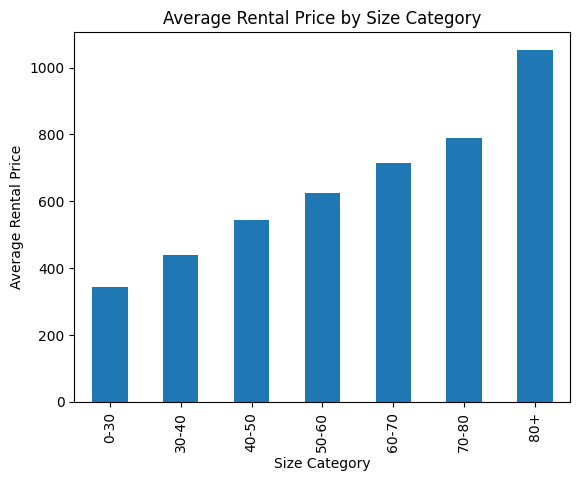

In [79]:
df.groupby('Size Category')["Rental Price"].mean().plot(kind='bar')
plt.xlabel('Size Category')
plt.ylabel('Average Rental Price')
plt.title('Average Rental Price by Size Category')
plt.show()

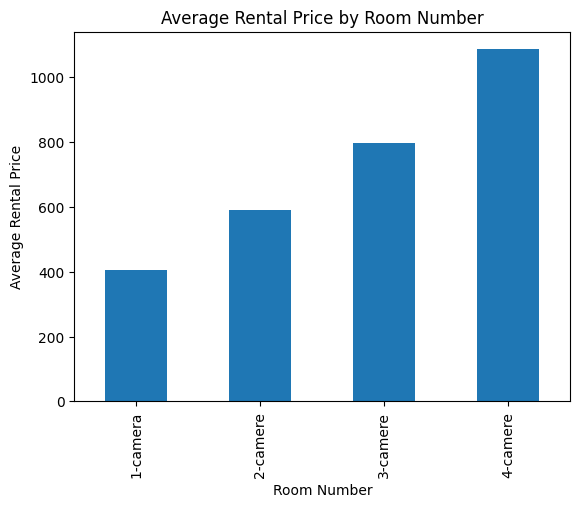

In [80]:
df.groupby('Room Number')["Rental Price"].mean().plot(kind='bar')
plt.xlabel('Room Number')
plt.ylabel('Average Rental Price')
plt.title('Average Rental Price by Room Number')
plt.show()

In [81]:
df

,Apartment Size,Rental Price,Room Number,Size Category
0,47,500,1-camera,40-50
1,20,121,1-camera,0-30
2,20,300,1-camera,0-30
3,40,350,1-camera,30-40
4,40,450,1-camera,30-40
...,...,...,...,...
2627,80,900,4-camere,70-80
2628,100,1050,4-camere,80+
2629,128,900,4-camere,80+
2630,87,800,4-camere,80+


<ipython-input-82-62b8fba6816b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  double_group = grouped.get_group(group).groupby('Size Category')['Rental Price'].mean().plot(kind='bar')


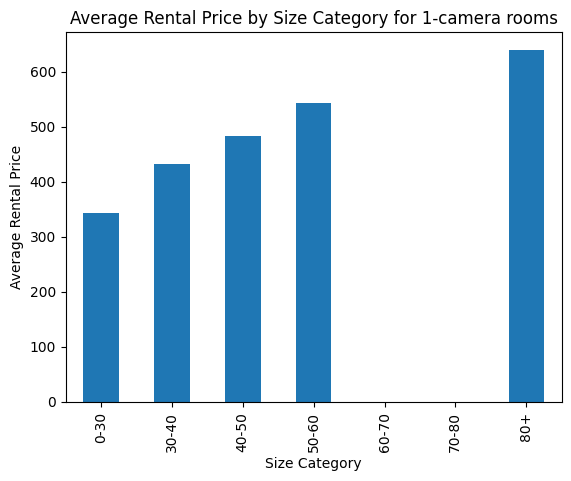

<ipython-input-82-62b8fba6816b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  double_group = grouped.get_group(group).groupby('Size Category')['Rental Price'].mean().plot(kind='bar')


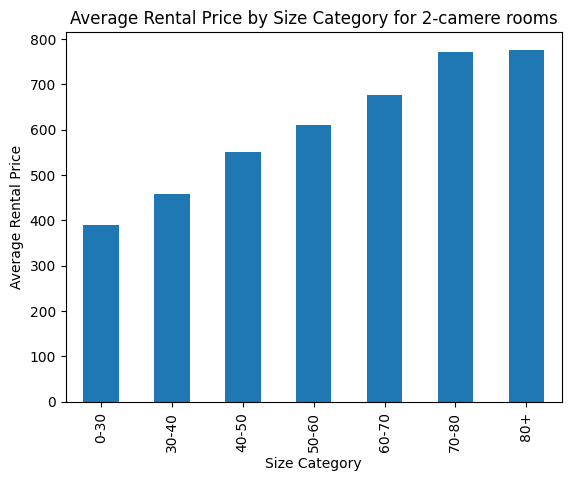

<ipython-input-82-62b8fba6816b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  double_group = grouped.get_group(group).groupby('Size Category')['Rental Price'].mean().plot(kind='bar')


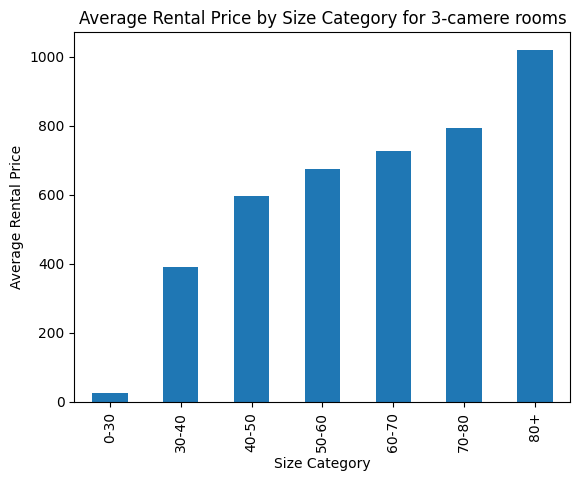

<ipython-input-82-62b8fba6816b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  double_group = grouped.get_group(group).groupby('Size Category')['Rental Price'].mean().plot(kind='bar')


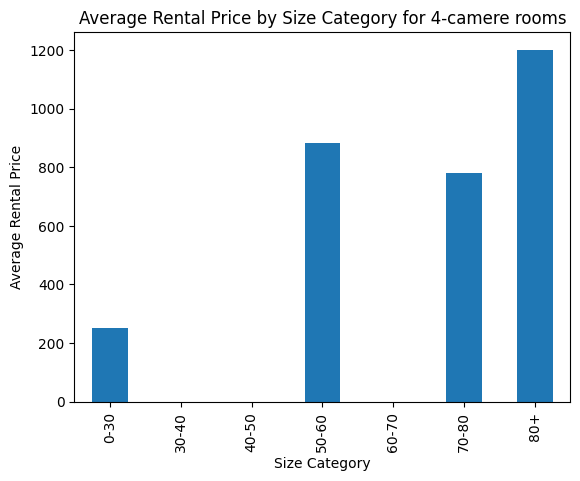

In [82]:
grouped = df.groupby('Room Number')
for group in grouped.groups:
    double_group = grouped.get_group(group).groupby('Size Category')['Rental Price'].mean().plot(kind='bar')
    plt.xlabel('Size Category')
    plt.ylabel('Average Rental Price')
    plt.title(f'Average Rental Price by Size Category for {group} rooms')
    plt.show()
